<a href="https://colab.research.google.com/github/dineshreddy221/License_plate_detection/blob/main/Veh_plate_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## Detecting the vehicle plate and recording details



<b>Problem Statement</b><br>
Detect the number plate of vehicles on the Entry exit Gate and record the details.

In [1]:
!pip install -U yolov5
!pip install pytesseract opencv-python
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 35 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 3s (1,583 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

## Importing the required libraries

In [2]:
import torch
import cv2
from datetime import datetime
import pandas as pd
import numpy as np
import pickle
import yolov5



## Loading the pretrained model from hugging Face


config.json:   0%|          | 0.00/80.0 [00:00<?, ?B/s]

best.pt:   0%|          | 0.00/42.1M [00:00<?, ?B/s]

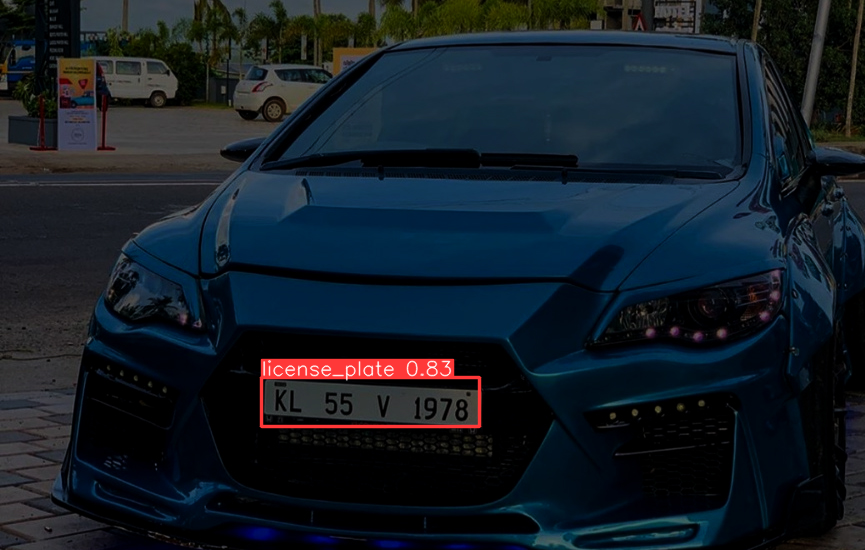

In [7]:
import yolov5

# load model
model = yolov5.load('keremberke/yolov5m-license-plate')

# set model parameters
model.conf = 0.25  # NMS confidence threshold
model.iou = 0.45  # NMS IoU threshold
model.agnostic = False  # NMS class-agnostic
model.multi_label = False  # NMS multiple labels per box
model.max_det = 1000  # maximum number of detections per image

# set image
img = '/content/sample_data/sub-ban2.jpg'

results = model(img, size=640)

# inference with test time augmentation
results = model(img, augment=True)

# parse results
predictions = results.pred[0]
boxes = predictions[:, :4] # x1, y1, x2, y2
scores = predictions[:, 4]
categories = predictions[:, 5]

# show detection bounding boxes on image
results.show()


## Extracting detected plate and creating a dataframe.

In [8]:
import pytesseract
# Load the image outside the loop if possible
plate_img = cv2.imread(img)

# Iterate over each detected box
data = []
for box, score, category in zip(boxes, scores, categories):
    # Extract coordinates
    x1, y1, x2, y2 = box.cpu().numpy().astype(int)
    # Crop the detected plate region
    plate_region = plate_img[y1:y2, x1:x2]
    # Apply OCR to extract text from the plate
    plate_text = pytesseract.image_to_string(plate_region, config='--psm 6', nice=0, output_type=pytesseract.Output.STRING)
    # Store current date and time
    current_time = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

    # Append to the list
    data.append({'vehicle_number': plate_text, 'Entry_time': current_time})

# Create DataFrame
df = pd.DataFrame(data)
df


,vehicle_number,Entry_time
0,KL 55 V 1978\n,2024-03-05 09:14:31
